# Example usage of the `3dq8_20M` fitting model

`3dq8_20M` models ampitudes and phases of the ringdown from a quasi-circular, non-precessing black-hole binary. It is calibrated up to mass ratio 8 and at a starting time $t_{\rm start}=20M$ from the peak of the $(2,2)$ strain.

The model natively fits for the effective cartesian coordinates $\tilde A^{x,y}$ defined by
$$
\tilde A_{\rm mode}^x+i\tilde A^y_{\rm mode}=\tilde A_{\rm mode}e^{i\beta\tilde\phi_{\rm mode}}
$$

where $\beta=1$ if we are computing predictions for a mode corresponding to spherical-harmonic indices $(l,m)$ with even $m$, while $\beta=2$ for odd $m$.

The amplitudes $\tilde A$ are the relative amplitudes $\tilde A_{\rm mode}=A_{\rm mode}/A_{220}$, with the only exception that $\tilde A_{220}\equiv A_{220}$.

The relative phases are defined as $\tilde\phi_{\rm mode}=\phi_{\rm mode}-\frac{m}{2}\phi_{220}$.

They are extracted from $\tilde A_{\rm mode}^{x,y}$ as
$$
\tilde A_{\rm mode}={\rm abs}(\tilde A_{\rm mode}^x+i\tilde A_{\rm mode}^y)
$$
$$
\tilde\phi_{\rm mode}=\frac{{\rm angle}(\tilde A_{\rm mode}^x+i\tilde A_{\rm mode}^y)}{\beta}~{\rm rad}
$$
meaning that $\tilde\phi_{\rm mode}$ has support in the interval $[-\pi,\pi]$.

1-$\sigma$ uncertainties are propagated as
$$
\sigma_{\tilde A}=\frac{\sqrt{\left(\sigma^x\tilde A^x\right)^2+\left(\sigma^y\tilde A^y\right)^2}}{\tilde A}
$$
$$
\sigma_{\tilde \phi}=\frac{\sqrt{\left(\sigma^y\tilde A^x\right)^2+\left(\sigma^x\tilde A^y\right)^2}}{\beta\tilde A^2}~{\rm rad}
$$

__Note:__ the model does not return predictions for mixing modes, i.e. modes $(l',m,n)$ contributing to a spherical harmonic $(l,m)$ with $l'\neq l$. Rather, it is assumed that they are be derived from the non-mixing modes $(l',m,n)$ and from the corresponding spherical-spheroidal mixing coefficients $\mu_{mll'n}$.

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import postmerger as pm

## Load fit

In [4]:
fitname = '3dq8_20M'
fit = pm.load_fit(fitname)
fit

/home/fra/miniconda3/envs/pm_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fra/miniconda3/envs/pm_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/fra/miniconda3/envs/pm_env/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.2 

3dq8_20M models ampitudes and phases of the ringdown from a quasi-circular, non-precessing black-hole binary.
It is calibrated up to mass ratio 8 and at a starting time 20M from the peak of the (2,2) strain.

## Read documentation

In [5]:
help(fit)

Help on AmplitudeFit3dq8 in module postmerger._fits object:

class AmplitudeFit3dq8(builtins.object)
 |  AmplitudeFit3dq8(fit_dict)
 |
 |  Methods defined here:
 |
 |  __init__(self, fit_dict)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __print__(self)
 |
 |  __repr__(self)
 |      Return repr(self).
 |
 |  predict_amp(self, mass_ratio, chi1z, chi2z, lm, mode, return_std=False, start_time=None)
 |      Predict the value of abs(A^x+iA^y) corresponding to the query points (mass_ratio,chi1z,chi2z).
 |
 |      Parameters
 |      ----------
 |      mass_ratio : array_like of shape (n_samples,) or float
 |          Mass ratio of the query points.
 |
 |      chi1z : array_like of shape (n_samples,) or float
 |          Projection along the z axis of the primary spin.
 |
 |      chi2z : array_like of shape (n_samples,) or float
 |          Projection along the z axis of the secondary spin.
 |
 |      lm : tuple_like object
 |          Ordered couple (l,m) spec

## Predict relative amplitudes and phases

In [6]:
## inspect available modes
## syntax: {(l,m): lm_modes}
fit.modes

{(2, 2): [(2, 2, 0), (2, 2, 1)],
 (2, 1): [(2, 1, 0), (2, 1, 1)],
 (3, 3): [(3, 3, 0), (3, 3, 1)],
 (3, 2): [(3, 2, 0), (3, 2, 1)],
 (4, 4): [(4, 4, 0), (4, 4, 1), ((2, 2, 0), (2, 2, 0))],
 (4, 3): [(4, 3, 0), (4, 3, 1)],
 (5, 5): [(5, 5, 0), (5, 5, 1), ((2, 2, 0), (3, 3, 0))]}

In [14]:
## binary parameters
mass_ratio = 1.5 # defined to be >=1
chi1z = 0.1
chi2z = 0.

## spherical-harmonic indices
lm = (3,3)

## mode indices
mode = (3,3,0)

## predict
amp, sigma_amp = fit.predict_amp(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)
phi, sigma_phi = fit.predict_phase(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)

## results
print(f'relative amplitude 330:\t  {amp[0]:.3f}(+/-){sigma_amp[0]:.3f}')
print(f'relative phase 330:\t  {phi[0]:.3f}(+/-){sigma_phi[0]:.3f}')

relative amplitude 330:	  0.115(+/-)0.018
relative phase 330:	  1.256(+/-)0.024


You can convert relative amplitudes to absolute ones by simple multiplication to $A_{220}$:

In [16]:
amp, sigma_amp = fit.predict_amp(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)
amp_220, sigma_amp_220 = fit.predict_amp(mass_ratio,chi1z,chi2z,(2,2),(2,2,0),return_std=True)
amp_abs = amp*amp_220
sigma_amp_abs = np.sqrt(sigma_amp**2+sigma_amp_220**2)

print(f'Absolute amplitude 220:\t  {amp_220[0]:.3f}(+/-){sigma_amp_220[0]:.3f}')
print(f'Absolute amplitude 330:\t  {amp_abs[0]:.3f}(+/-){sigma_amp_abs[0]:.3f}')

Absolute amplitude 220:	  0.173(+/-)0.001
Absolute amplitude 330:	  0.020(+/-)0.018


You can also predict $\tilde A^{x,y}$ directly:

In [19]:
## predict x and y
amp_x, amp_y, sigma_x, sigma_y = fit.predict_xy_amp(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)

## results
print(f'relative amplitude x:\t  {amp_x[0]:.3f}(+/-){sigma_x[0]:.3f}')
print(f'relative amplitude y:\t  {amp_y[0]:.3f}(+/-){sigma_y[0]:.3f}')

relative amplitude x:	  -0.093(+/-)0.022
relative amplitude y:	  0.068(+/-)0.005


By default, predicitions are returned at a starting time $20M$ after the peak. You can retrodict (or postdict) the predictions to a different starting time using the `start_time` argument:

In [ ]:
## start time in units of the initial total mass M
start_time = 10

## predict
amp, sigma_amp = fit.predict_amp(mass_ratio,chi1z,chi2z,lm,mode,return_std=True,start_time=start_time)
phi, sigma_phi = fit.predict_phase(mass_ratio,chi1z,chi2z,lm,mode,return_std=True,start_time=start_time)

## results
print(f'relative amplitude 330:\t  {amp[0]:.3f}(+/-){sigma_amp[0]:.3f}')
print(f'relative phase 330:\t  {phi[0]:.3f}(+/-){sigma_phi[0]:.3f}')

relative amplitude 330:	  0.117(+/-)0.019
relative phase 330:	  -0.566(+/-)0.024


## Batch evaluation

In [21]:
## binary parameters
mass_ratio = np.linspace(1,8,100)
chi1z = 0.
chi2z = 0.

## spherical-harmonic indices
lm = (3,3)

## mode indices
mode = (3,3,0)

## predict
amp, sigma_amp = fit.predict_amp(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)
phi, sigma_phi = fit.predict_phase(mass_ratio,chi1z,chi2z,lm,mode,return_std=True)

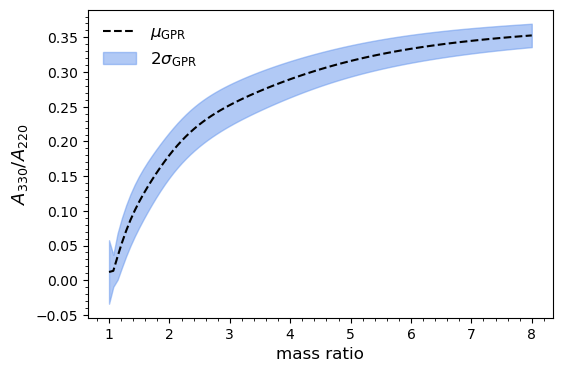

In [22]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(mass_ratio,amp,color='k',linestyle='--',label=r'$\mu_{\rm GPR}$')
axs.fill_between(mass_ratio,amp-2*sigma_amp,amp+2*sigma_amp,alpha=0.5,\
                 color='cornflowerblue',label=r'$2\sigma_{\rm GPR}$')
axs.set_xlabel('mass ratio',fontsize=12)
axs.set_ylabel(r'$A_{330}/A_{220}$',fontsize=13)
axs.minorticks_on()
axs.legend(fontsize=12,frameon=False)
plt.show()